In [54]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [55]:


total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [56]:
total_data.to_csv("../data/raw/total_data.csv", index = False)

Exploracion

In [57]:
total_data.shape

(1338, 7)

The DataFrame contains 1338 records (rows) and 7 variables (columns).

In [58]:
# Obtener información sobre tipos de datos y valores no nulos
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [59]:
total_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No hay nulos en esta dataset

In [60]:
duplicados=total_data.duplicated().sum()
duplicados

1

tenemos 1 duplicado procedemos eliminarlo

In [61]:
total_data_sinduplicados = total_data.drop_duplicates()
total_data_sinduplicados 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [62]:
total_data_sinduplicados.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

las variables categoricas transformamos en numericas

In [63]:
#factorize
total_data_sinduplicados["sex_n"] = pd.factorize(total_data_sinduplicados["sex"])[0]
total_data_sinduplicados["smoker_n"] = pd.factorize(total_data_sinduplicados["smoker"])[0]
total_data_sinduplicados["region_n"] = pd.factorize(total_data_sinduplicados["region"])[0]
total_data_sinduplicados.head()

/tmp/ipykernel_1044/3472470405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_data_sinduplicados["sex_n"] = pd.factorize(total_data_sinduplicados["sex"])[0]
/tmp/ipykernel_1044/3472470405.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_data_sinduplicados["smoker_n"] = pd.factorize(total_data_sinduplicados["smoker"])[0]
/tmp/ipykernel_1044/3472470405.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2


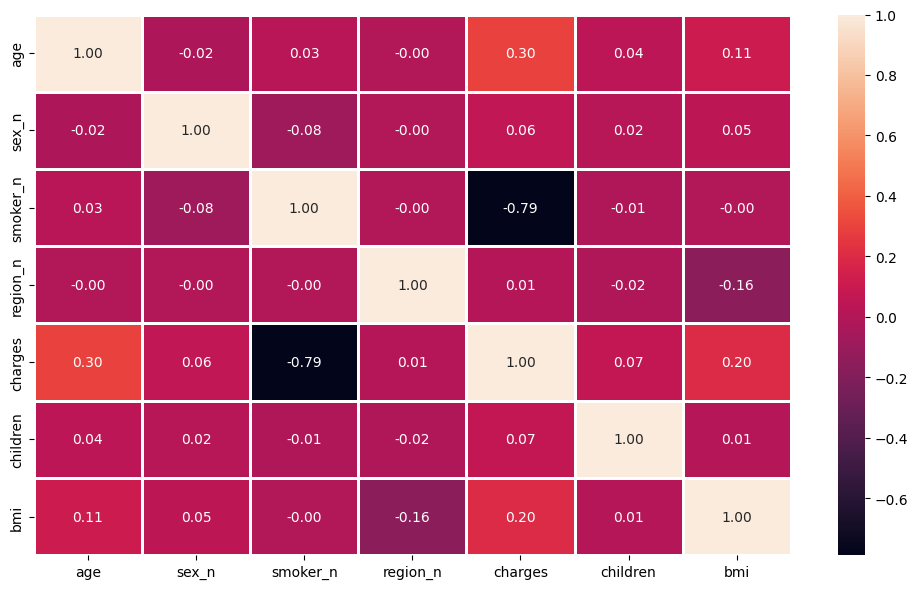

In [64]:
#correlacion

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data_sinduplicados[['age','sex_n', 'smoker_n', 'region_n', 'charges', 'children', 'bmi']].corr(), annot = True, fmt = ".2f",linecolor='white',linewidths=1)

plt.tight_layout()

plt.show()

As this correlation shows:

the charges and smoke tienen relacion Negativa totalmente, significa los clientes fumadores tienen la contribucion muy alta en seguro.
charges and age tiene relacion , con mas edad pagas mas.
the bmi and charge tambien se relacionan.Masa corporal y pago seguro .
la religion no tiene ninguna relacion con nada. Lo voy eliminar.

In [65]:
total_data_sinduplicados 

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,1,2
1334,18,female,31.920,0,no,northeast,2205.98080,0,1,3
1335,18,female,36.850,0,no,southeast,1629.83350,0,1,1
1336,21,female,25.800,0,no,southwest,2007.94500,0,1,0


In [66]:
# Check if the column 'religion' exists in the DataFrame
if 'religion' in total_data_sinduplicados.columns:
    # Drop the 'religion' column
    total_data_sinduplicados.drop(['region_n'], axis=1, inplace=True)
    # Print the first few rows to verify changes
    print(total_data_sinduplicados.head())
else:
    print("'region_n' column does not exist in the DataFrame.")

'region_n' column does not exist in the DataFrame.


In [67]:
total_data_sinduplicados.to_csv("../data/raw/total_data_sinduplicados.csv", index = False)

<Axes: xlabel='Count', ylabel='region'>

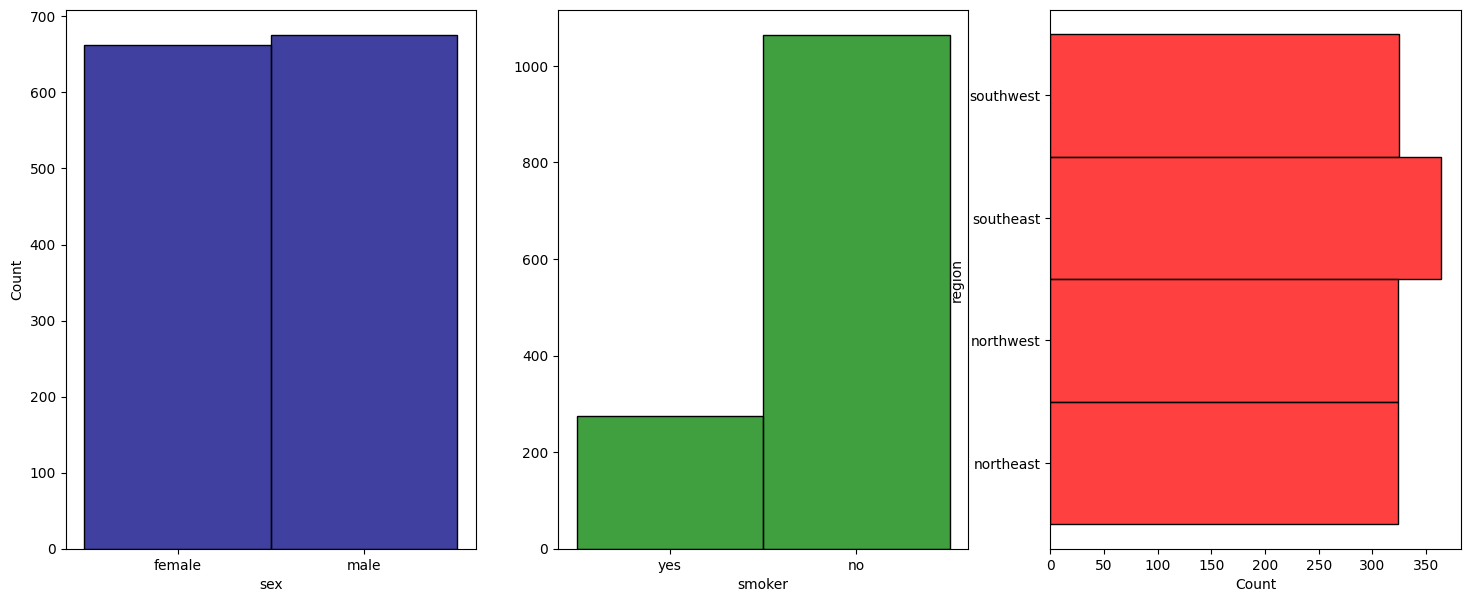

In [68]:
#Categorical
fig, axis = plt.subplots(1, 3, figsize = (18, 7))

sns.histplot(ax = axis[0], data = total_data_sinduplicados, x = "sex", color='navy')
sns.histplot(ax = axis[1], data = total_data_sinduplicados, x = "smoker", color='green').set_ylabel(None)
sns.histplot(ax = axis[2], data = total_data_sinduplicados, y = "region", color='red')

Como muestra la trama, el sexo y la región están muy igualados, mientras que el fumador Mayoria NO fUMA

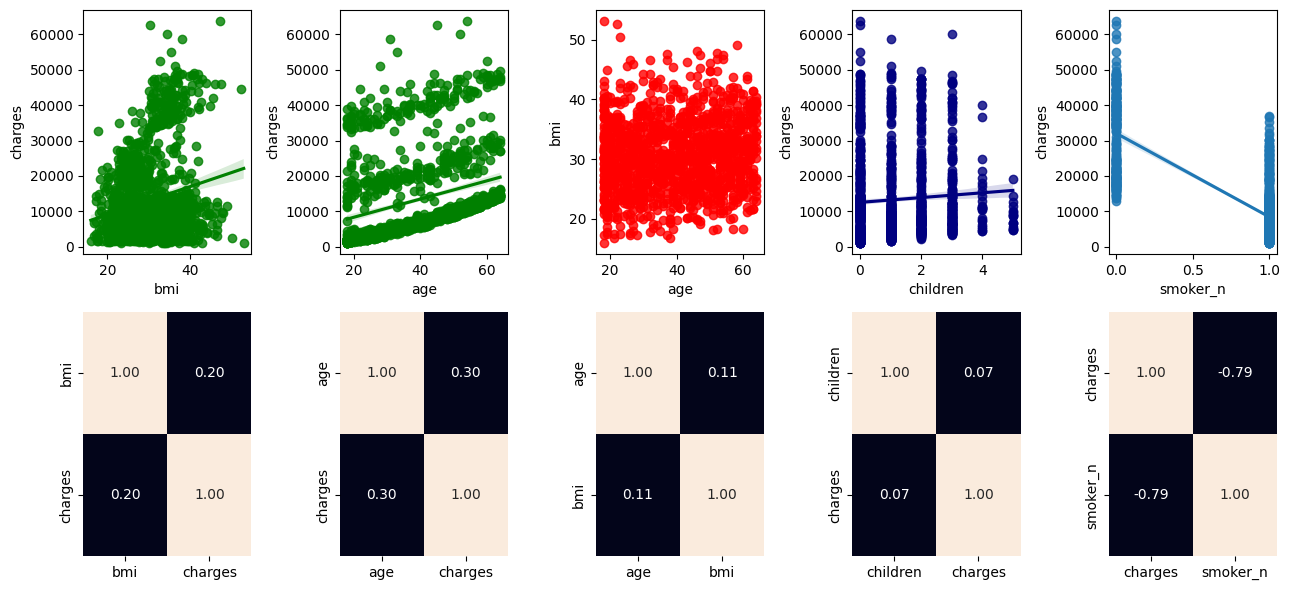

In [69]:
#Numeric-numeric
fig, axis = plt.subplots(2, 5, figsize = (13, 6))



sns.regplot(ax = axis[0, 0], data = total_data_sinduplicados , x = "bmi", y = "charges", color='green')
sns.heatmap(total_data_sinduplicados[["bmi", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_data_sinduplicados , x = "age", y = "charges" ,color='green' )
sns.heatmap(total_data_sinduplicados[["age", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(ax = axis[0, 2], data = total_data_sinduplicados , x = "age", y = "bmi",color='red')
sns.heatmap(total_data_sinduplicados[["age", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2], cbar = False)

sns.regplot(ax = axis[0, 3], data = total_data_sinduplicados , x = "children", y = "charges", color='navy')
sns.heatmap(total_data_sinduplicados[["children", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 3], cbar = False)

sns.regplot(data = total_data_sinduplicados, x = "smoker_n", y = "charges", ax = axis[0, 4])
sns.heatmap(total_data_sinduplicados[["charges", "smoker_n"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 4], cbar = False)



plt.tight_layout()
plt.show()

- HAY RELACION ENTRE BMI Y CHARGES Y CHARGES Y AGE
- MUY FUERTE RELACION NEGTIVA DE FUMADORES Y EL PAGO
- PErO CASI NO HAY RELACION ENTRE CHILDREN Y CHARGES

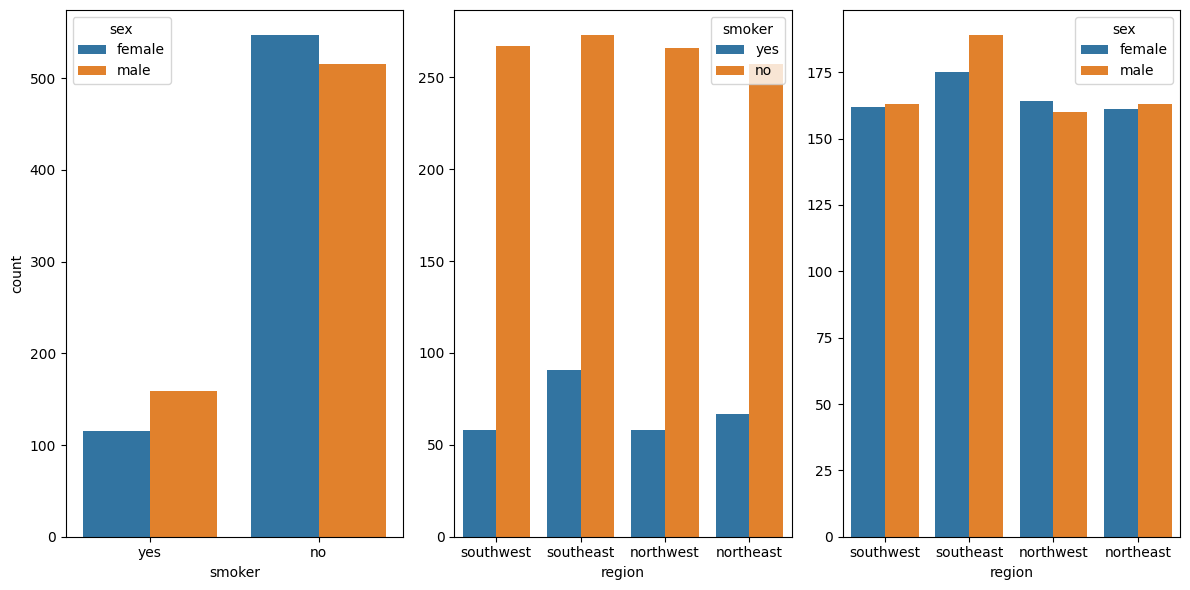

In [70]:
#Categorical-categorical
fig, axis = plt.subplots(1, 3, figsize = (12, 6))

sns.countplot(ax = axis[0], data = total_data_sinduplicados, x = "smoker", hue = "sex")
sns.countplot(ax = axis[1], data = total_data_sinduplicados, x = "region", hue = "smoker").set_ylabel(None)
sns.countplot(ax = axis[2], data = total_data_sinduplicados, x = "region", hue = "sex").set_ylabel(None)


plt.tight_layout()
plt.show()

Concluimos que fumadores son Minoria, mayoria fumadores son hombres. En cualquer region No fumadores Mayoria,un poco mas fumadores en Southeast region.En mismo region viven mas gente.

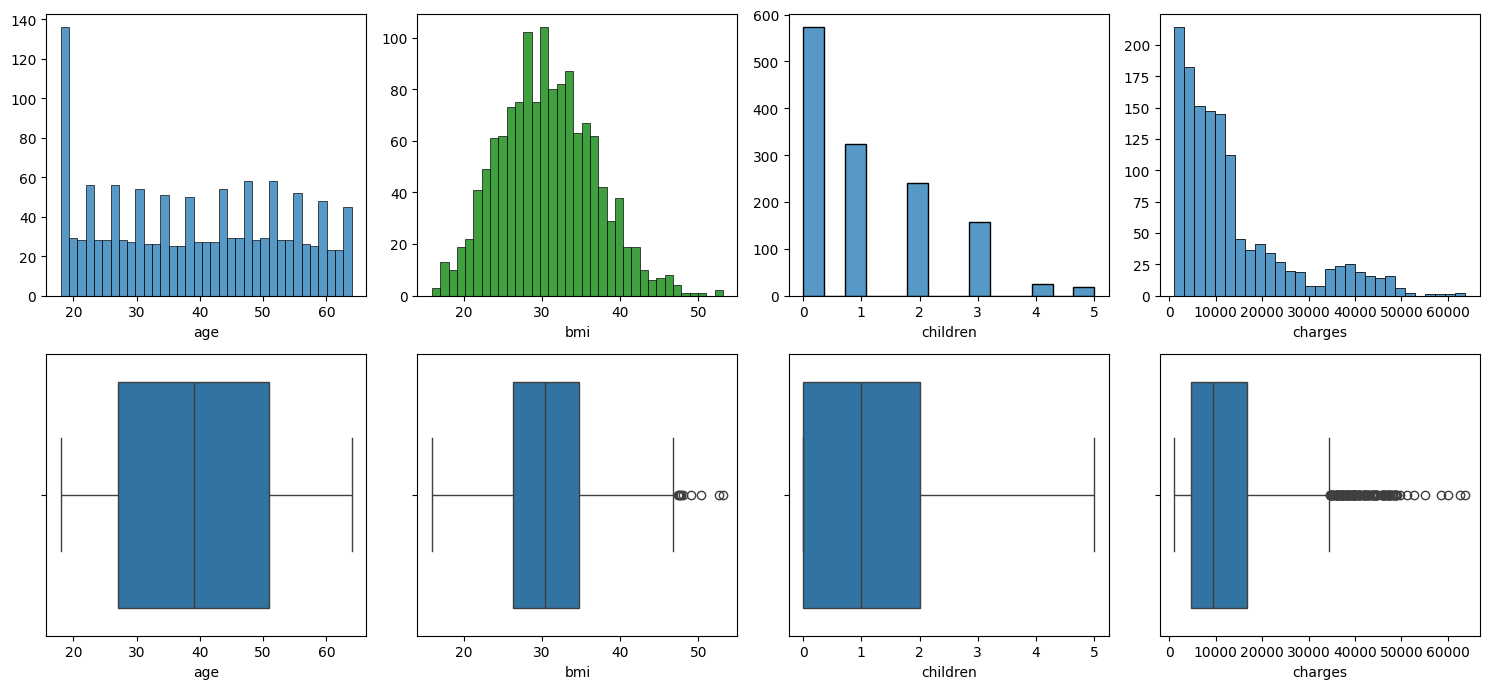

In [71]:
fig, axis = plt.subplots(2, 4, figsize = (15, 7))

sns.histplot(ax = axis[0, 0], data = total_data_sinduplicados, x = "age",bins=35).set(ylabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data_sinduplicados, x = "age")

sns.histplot(ax = axis[0, 1], data = total_data_sinduplicados, x = "bmi",bins=35, color='green').set(ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data_sinduplicados, x = "bmi")

sns.histplot(ax = axis[0, 2], data = total_data_sinduplicados, x = "children").set(ylabel = None)
sns.boxplot(ax = axis[1, 2], data = total_data_sinduplicados, x = "children")

sns.histplot(ax = axis[0, 3], data = total_data_sinduplicados, x = "charges").set(ylabel = None)
sns.boxplot(ax = axis[1, 3], data = total_data_sinduplicados, x = "charges")




# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


plt.show()

age. Edad del beneficiario principal (numérico) sex. Género del beneficiario principal (categórico) bmi. Indice de masa corporal (numérico) children. Número de niños/dependientes cubiertos por el seguro de salud (numérico) smoker. ¿Es fumador? (categórico) region. Área residencial del beneficiario en USA: noreste, sureste, suroeste, noroeste (categórico) charges. Prima del seguro médico (numerico)

In [72]:
age_stats = total_data_sinduplicados["age"].describe()
age_stats

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [73]:
age_iqr = age_stats["75%"] - age_stats["25%"]
upper_limit = age_stats["75%"] + 1.5 *age_iqr 
lower_limit  = age_stats["25%"] - 1.5 * age_iqr 

print(f"Los limites superior e inferior para la busqueda de outliers  {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(age_iqr, 2)}")

Los limites superior e inferior para la busqueda de outliers  87.0 and -9.0, with an interquartile range of 24.0



Los limites superior e inferior para la busqueda de outliers  87.0 and -9.0, with an interquartile range of 24.0

In [74]:
menores=total_data_sinduplicados[total_data_sinduplicados['age']<28]
menores

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
10,25,male,26.220,0,no,northeast,2721.32080,1,1,3
12,23,male,34.400,0,no,southwest,1826.84300,1,1,0
14,27,male,42.130,0,yes,southeast,39611.75770,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1328,23,female,24.225,2,no,northeast,22395.74424,0,1,3
1331,23,female,33.400,0,no,southwest,10795.93733,0,1,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,1,3
1335,18,female,36.850,0,no,southeast,1629.83350,0,1,1


In [75]:
bmi_stats = total_data_sinduplicados["bmi"].describe()
bmi_stats

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

In [76]:
total_data_no_outliers=total_data_sinduplicados.copy()

In [77]:
from statistics import mode
mode_bmi = total_data_no_outliers["bmi"].mode()
#print (mode_bmi)
# Replacing outliers with the mode value
total_data_no_outliers['bmi'] = total_data_no_outliers['bmi'].apply(lambda x: mode_bmi[0] if x > 53 else x)
print(total_data_no_outliers.bmi.value_counts())
total_data_no_outliers['bmi'].max()

bmi
32.300    14
28.310     9
28.880     8
30.800     8
30.875     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 547, dtype: int64


52.58

In [78]:
total_data_no_outliers.to_csv("../data/raw/total_data_no_outliers.csv", index = False)

DIVIDIMOS 

In [79]:
#factorize
total_data["sex_n"] = pd.factorize(total_data["sex"])[0]
total_data["smoker_n"] = pd.factorize(total_data["smoker"])[0]
total_data["region_n"] = pd.factorize(total_data["region"])[0]
total_data.head()

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2


In [80]:
total_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges', 'sex_n',
       'smoker_n', 'region_n'],
      dtype='object')

In [81]:
from sklearn.model_selection import train_test_split

num_variables = ["age", "bmi", "children", "sex_n", "smoker_n", "region_n"]

# Dividimos el conjunto de datos en muestras de train y test
X = total_data.drop("charges", axis = 1)[num_variables]
y = total_data["charges"]

X_train_o_M, X_test_o_M, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train_o_M.head()

,age,bmi,children,sex_n,smoker_n,region_n
560,46,19.95,2,0,1,2
1285,47,24.32,0,0,1,3
1142,52,24.86,0,0,1,1
969,39,34.32,5,0,1,1
486,54,21.47,3,0,1,2


In [82]:
# Min-Max scaler

from sklearn.preprocessing import MinMaxScaler

scalerOM = MinMaxScaler()
scalerOM.fit(X_train_o_M)

X_train_scal_OM = scalerOM.transform(X_train_o_M)

scal_features = scalerOM.fit_transform(total_data[num_variables])
total_data_scal = pd.DataFrame(scal_features, index = total_data.index, columns = num_variables)
total_data_scal.head()

,age,bmi,children,sex_n,smoker_n,region_n
0,0.021739,0.321227,0.0,0.0,0.0,0.000000
1,0.000000,0.479150,0.2,1.0,1.0,0.333333
2,0.217391,0.458434,0.6,1.0,1.0,0.333333
3,0.326087,0.181464,0.0,1.0,1.0,0.666667
4,0.304348,0.347592,0.0,1.0,1.0,0.666667


In [83]:


X_train_o_M.to_csv("../data/raw/X_test_dataoriginal_M.csv", index = False)
X_test_o_M.to_csv("../data/raw/X_train_dataoriginal_M.csv", index = False)

In [84]:
from pickle import dump
 
dump(scalerOM, open("../data/processed/DataOriginalescaladoMM.sav", "wb"))

In [85]:
total_data_scal.columns

Index(['age', 'bmi', 'children', 'sex_n', 'smoker_n', 'region_n'], dtype='object')

In [86]:
# Feature selection

from sklearn.feature_selection import SelectKBest, f_regression


X =total_data_scal


X_train_o_M, X_test_o_M, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(f_regression, k = 4)
selection_model.fit(X_train_o_M, y_train)

selected_columns = X_train_o_M.columns[selection_model.get_support()]
X_train_sel_o_M = pd.DataFrame(selection_model.transform(X_train_o_M), columns = selected_columns)
X_test_sel_o_M = pd.DataFrame(selection_model.transform(X_test_o_M), columns = selected_columns)

X_train_sel_o_M.head()

,age,bmi,children,smoker_n
0,0.608696,0.107345,0.4,1.0
1,0.630435,0.224913,0.0,1.0
2,0.739130,0.239440,0.0,1.0
3,0.456522,0.493947,1.0,1.0
4,0.782609,0.148238,0.6,1.0


In [87]:
X_test_sel_o_M.head()

,age,bmi,children,smoker_n
0,0.586957,0.247915,0.4,1.0
1,0.391304,0.378262,0.0,1.0
2,1.000000,0.293920,0.0,0.0
3,0.608696,0.263250,0.6,1.0
4,0.021739,0.429379,0.0,0.0


In [89]:
X_train_sel_o_M["charges"] = y_train.values
X_test_sel_o_M["charges"] = y_test.values
X_train_sel_o_M.to_csv("../data/processed/DataOriginal_trainMM.csv", index = False)
X_test_sel_o_M.to_csv("../data/processed/DataOriginal_testMM.csv", index = False)

Linear Regression model

In [90]:
train_data = pd.read_csv("../data/processed/DataOriginal_trainMM.csv")
test_data = pd.read_csv("../data/processed/DataOriginal_testMM.csv")

train_data.head()

,age,bmi,children,smoker_n,charges
0,0.608696,0.107345,0.4,1.0,9193.83850
1,0.630435,0.224913,0.0,1.0,8534.67180
2,0.739130,0.239440,0.0,1.0,27117.99378
3,0.456522,0.493947,1.0,1.0,8596.82780
4,0.782609,0.148238,0.6,1.0,12475.35130


In [91]:
X_train_OM = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test_OM = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

In [92]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_OM, y_train)

LinearRegression()

In [93]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")

Intercep (a): 21390.678607575144
Coefficients (b1, b2): [ 11825.27326582  12174.01619773   2135.99985473 -23653.21164629]


In [94]:
y_pred = model.predict(X_test_OM)
y_pred

array([ 8550.90921341,  6969.71599759, 36794.13661808,  9421.86824203,
       26875.01095777, 11101.26514111,   141.44896605, 16750.22436643,
         743.78364016, 11157.63586446, 28521.42342227,  9296.15962897,
        5456.5831315 , 38513.59317763, 40362.63211366, 37226.61219261,
       15312.47750251, 36042.83494384,  9322.40796481, 31395.64230108,
        4273.49461256, 10468.62243337,  2723.96491222,  6575.5287315 ,
       11228.01912269, 12468.20703945, 14803.23875441,  6062.13408867,
        9531.77127863,  2381.73787018,  9470.9842188 , 12959.38866372,
        4702.13338911,  3410.73606761,  4819.65393639, 12488.16536441,
        2355.2166747 ,  9157.11135848, 33234.15784494, 32746.69484389,
        4270.42403098,  4233.52485656, 14431.41993531, 11388.84943272,
        8929.60714179, 12484.19557109,  5150.40526844,  3550.1037231 ,
       35652.7853174 ,  9280.12457197, 15967.47938558,  2556.74541518,
       12158.95859481,  1066.73450634, 13555.51395976, 12107.63444981,
      

In [95]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 33981653.95019776
R2 Score: 0.7811147722517886


Cuanto menor sea el valor del RMSE, mejor será el modelo. Un modelo perfecto (un modelo hipotético que siempre pueda predecir el valor esperado exacto) tendría un valor para esta métrica de 0. Observamos que hay un descuadre de 35 millones, por lo que podríamos entender que es muy malo. Si nos apoyamos en el valor del 
, observamos que es de un 80%, un valor muy alto, luego el 80% de los datos están explicados por el modelo, por lo que es satisfactorio.

Min-Max scaler ESCALADO DA MEJOR RESULTADO 80% que NORMALIZADO(69%)

R2 Score: 0.7811147722517886 es mejor resultado que dataset original normalizado. Minmax da mejor resultado que normalizacion en todos dataset original o sin outliers